In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_table('alexa_reviews.tsv')
df.head()

,Unnamed: 0,verified_reviews,feedback
0,0,Love my Echo!,1
1,1,Loved it!,1
2,2,"Sometimes while playing a game, you can answer...",1
3,3,I have had a lot of fun with this thing. My 4 ...,1
4,4,Music,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   verified_reviews  3150 non-null   object
 2   feedback          3150 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 74.0+ KB


In [ ]:
df.isna().sum()

Unnamed: 0          0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
from wordcloud import WordCloud

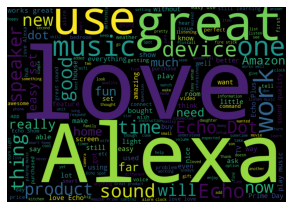

In [ ]:
wc = WordCloud(width=1000,height=700,background_color='black',min_font_size=10)
wc.generate("".join(df[df['feedback']==1]['verified_reviews']))
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

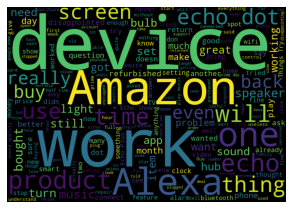

In [ ]:
wc = WordCloud(width=1000,height=700,background_color='black',min_font_size=10)
wc.generate("".join(df[df['feedback']==0]['verified_reviews']))
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
def cleantext(text):
  token = word_tokenize(text.lower())
  ftoken = [t for t in token if(t.isalpha())]
  stopword = stopwords.words("english")
  stoken = [t for t in ftoken if(t not in stopword)]
  lemm = WordNetLemmatizer()
  ltoken = [lemm.lemmatize(t) for t in stoken]
  return " ".join(ltoken)

In [ ]:
df['verified_reviews']=df['verified_reviews'].apply(cleantext)

In [ ]:
x = df['verified_reviews']
y = df['feedback']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.38      0.53        73
           1       0.95      0.99      0.97       872

    accuracy                           0.95       945
   macro avg       0.90      0.69      0.75       945
weighted avg       0.94      0.95      0.94       945



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ann = Sequential()
ann.add(Dense(10,activation='relu'))
ann.add(Dense(10,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

ann.fit(xtrain,ytrain,batch_size=30,epochs=20)

Epoch 1/20
74/74 [==============================] - 2s 6ms/step - loss: 0.4848 - accuracy: 0.9147
Epoch 2/20
74/74 [==============================] - 1s 7ms/step - loss: 0.2681 - accuracy: 0.9166
Epoch 3/20
74/74 [==============================] - 0s 6ms/step - loss: 0.1805 - accuracy: 0.9166
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 0.1359 - accuracy: 0.9338
Epoch 5/20
74/74 [==============================] - 0s 6ms/step - loss: 0.1035 - accuracy: 0.9615
Epoch 6/20
74/74 [==============================] - 0s 6ms/step - loss: 0.0791 - accuracy: 0.9732
Epoch 7/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0632 - accuracy: 0.9800
Epoch 8/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0525 - accuracy: 0.9846
Epoch 9/20
74/74 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.9868
Epoch 10/20
74/74 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9882
Epoch 11/20
74/74 [

In [ ]:
ypred=ann.predict(xtest)

In [ ]:
ypred = ypred>0.5

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.45      0.54        73
           1       0.96      0.98      0.97       872

    accuracy                           0.94       945
   macro avg       0.81      0.72      0.75       945
weighted avg       0.93      0.94      0.93       945

